# Import Libraries

In [1]:
from __future__ import print_function
from datetime import datetime, timedelta
import time

import numpy as np
import pandas as pd
import os
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn; seaborn.set(style='white')
%matplotlib inline

# Import Data

Yahoo Finance ^GSPC
* Select
    * Time Period: Jan 03, 1950 - Jul 05, 2018
    * Show: Historical Prices
    * Frequency: Daily 
    * Click -> "Apply"
    * Click -> "Download Data"
* URL: https://finance.yahoo.com/quote/%5EGSPC/history/

## sp500 daily

In [2]:
sp_data_csv_path = 'sp500_yahoo_data_gspc_daily.csv'
df_sp500 = pd.read_csv(sp_data_csv_path)

In [3]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [4]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17237 entries, 0 to 17236
Data columns (total 7 columns):
Date         17237 non-null object
Open         17237 non-null float64
High         17237 non-null float64
Low          17237 non-null float64
Close        17237 non-null float64
Adj Close    17237 non-null float64
Volume       17237 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 942.7+ KB


## sp500 timeperiodpricereturn

* For how this dataset was created, see Jupyter Notebook: "sp500_timeperiodpricereturn.ipynb"

In [5]:
sp_data_csv_path = 'sp500_timeperiodpricereturn_output_1-7560.csv'
df_trading_days_roi = pd.read_csv(sp_data_csv_path)

In [6]:
df_trading_days_roi.head(2)

,start_date,end_date,trading_days,start_price,end_price,price_difference,roi
0,1950-01-03,1950-01-04,1,16.66,16.85,0.19,0.011405
1,1950-01-04,1950-01-05,1,16.85,16.93,0.08,0.004748


In [7]:
df_trading_days_roi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101731140 entries, 0 to 101731139
Data columns (total 7 columns):
start_date          object
end_date            object
trading_days        int64
start_price         float64
end_price           float64
price_difference    float64
roi                 float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.3+ GB


## sp500 summary

* For how this dataset was created, see Jupyter Notebook: "sp500_timeperiodpricereturn.ipynb"

In [8]:
sp_data_csv_path = 'sp500_timeperiodpricereturn_output_summary_1-7560.csv'
df_trading_days_roi_summary = pd.read_csv(sp_data_csv_path)

In [9]:
df_trading_days_roi_summary.head()

,trading_days,number_of_periods,roi_mean,roi_median,roi_min,roi_max,roi_range,number_of_periods_nonneg,number_of_periods_neg,percent_of_periods_nonneg,percent_of_periods_neg,marginal_nonneg_periods_per_day,cumulative_pos_periods_per_day
0,1,17236,0.000342,0.000468,-0.204669,0.115800,0.320470,9255,7981,0.536958,0.463042,0.000000,0.000000
1,2,17235,0.000686,0.001031,-0.245706,0.149173,0.394879,9420,7815,0.546562,0.453438,0.009605,0.009605
2,3,17234,0.001026,0.001707,-0.263375,0.139480,0.402855,9614,7620,0.557851,0.442149,0.011289,0.020893
3,4,17233,0.001366,0.002385,-0.285133,0.179735,0.464868,9685,7548,0.562003,0.437997,0.004152,0.025046
4,5,17232,0.001704,0.002800,-0.273280,0.191112,0.464391,9759,7473,0.566330,0.433670,0.004327,0.029373


In [10]:
df_trading_days_roi_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 13 columns):
trading_days                       7560 non-null int64
number_of_periods                  7560 non-null int64
roi_mean                           7560 non-null float64
roi_median                         7560 non-null float64
roi_min                            7560 non-null float64
roi_max                            7560 non-null float64
roi_range                          7560 non-null float64
number_of_periods_nonneg           7560 non-null int64
number_of_periods_neg              7560 non-null int64
percent_of_periods_nonneg          7560 non-null float64
percent_of_periods_neg             7560 non-null float64
marginal_nonneg_periods_per_day    7560 non-null float64
cumulative_pos_periods_per_day     7560 non-null float64
dtypes: float64(9), int64(4)
memory usage: 767.9 KB


# Add Year Attributes

In [11]:
df_trading_days_roi['start_year'] = df_trading_days_roi['start_date'].map(lambda x: x.split('-')[0])
df_trading_days_roi['end_year'] = df_trading_days_roi['end_date'].map(lambda x: x.split('-')[0])
df_trading_days_roi.head(2)

,start_date,end_date,trading_days,start_price,end_price,price_difference,roi,start_year,end_year
0,1950-01-03,1950-01-04,1,16.66,16.85,0.19,0.011405,1950,1950
1,1950-01-04,1950-01-05,1,16.85,16.93,0.08,0.004748,1950,1950


In [12]:
df_sp500['Year'] = df_sp500['Date'].map(lambda x: x.split('-')[0])
df_sp500.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000,1950
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000,1950


# Calulations

https://cntk.ai/pythondocs/CNTK_104_Finance_Timeseries_Basic_with_Pandas_Numpy.html

* "year"
* "count"
* "start"
* "low"
* "high"
* "end" 


* "change over year"
* "percent change over year"


* "biggest drop from start"
* "biggest gain from start"
* "percent biggest drop from start"
* "percent biggest gain from start"


* "percent biggest drop intrayear"
* "percent biggest gain intrayear"
* "biggest drop intrayear"
* "biggest gain intrayear"

In [13]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000,1950
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000,1950
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000,1950
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000,1950
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000,1950


## Year: Start, Min, Max, Last

In [14]:
df_year_stats = df_sp500.groupby(['Year']).agg({'Close': ['count', 'std', 'mean', 'first', 'min', 'max', 'last']})
df_year_stats.columns = df_year_stats.columns.droplevel()
df_year_stats.reset_index(drop=False, inplace=True)
df_year_stats.rename(columns={'Year': 'year'}, inplace=True)

df_year_stats['std_div_by_mean'] = df_year_stats['std'] / df_year_stats['mean']

col_order = ['year', 'count', 'std', 'mean', 'std_div_by_mean', 'first', 'min', 'max', 'last']
df_year_stats = df_year_stats[col_order]

df_year_stats.head(2)

,year,count,std,mean,std_div_by_mean,first,min,max,last
0,1950,249,1.059922,18.397269,0.057613,16.66,16.660000,20.43,20.43
1,1951,249,0.834271,22.321888,0.037375,20.77,20.690001,23.85,23.77


## From Start: Change Over Year

In [15]:
df_year_stats["change over year"] = (df_year_stats["last"] - df_year_stats["first"])
df_year_stats.head(2)

,year,count,std,mean,std_div_by_mean,first,min,max,last,change over year
0,1950,249,1.059922,18.397269,0.057613,16.66,16.660000,20.43,20.43,3.77
1,1951,249,0.834271,22.321888,0.037375,20.77,20.690001,23.85,23.77,3.00


In [16]:
df_year_stats["percent change over year"] = (df_year_stats["last"] - df_year_stats["first"]) / df_year_stats["first"]
df_year_stats.head(2)

,year,count,std,mean,std_div_by_mean,first,min,max,last,change over year,percent change over year
0,1950,249,1.059922,18.397269,0.057613,16.66,16.660000,20.43,20.43,3.77,0.226291
1,1951,249,0.834271,22.321888,0.037375,20.77,20.690001,23.85,23.77,3.00,0.144439


## From Start: Maxgain/ Maxdrop

In [17]:
df_year_stats['biggest gain from start'] = (df_year_stats['max'] - df_year_stats['first'])
df_year_stats['biggest drop from start'] = (df_year_stats['min'] - df_year_stats['first'])
df_year_stats.head()

,year,count,std,mean,std_div_by_mean,first,min,max,last,change over year,percent change over year,biggest gain from start,biggest drop from start
0,1950,249,1.059922,18.397269,0.057613,16.660000,16.660000,20.43,20.430000,3.770000,0.226291,3.770000,0.000000
1,1951,249,0.834271,22.321888,0.037375,20.770000,20.690001,23.85,23.770000,3.000000,0.144439,3.080000,-0.079999
2,1952,250,0.763674,24.496160,0.031175,23.799999,23.090000,26.59,26.570000,2.770001,0.116387,2.790001,-0.709999
3,1953,251,0.893228,24.722590,0.036130,26.540001,22.709999,26.66,24.809999,-1.730002,-0.065185,0.119999,-3.830002
4,1954,252,2.914372,29.724087,0.098047,24.950001,24.799999,35.98,35.980000,11.029999,0.442084,11.029999,-0.150002


In [18]:
df_year_stats['percent biggest gain from start'] = (df_year_stats['max'] - df_year_stats['first']) / df_year_stats['first']
df_year_stats['percent biggest drop from start'] = (df_year_stats['min'] - df_year_stats['first']) / df_year_stats['first']
df_year_stats.head()

,year,count,std,mean,std_div_by_mean,first,min,max,last,change over year,percent change over year,biggest gain from start,biggest drop from start,percent biggest gain from start,percent biggest drop from start
0,1950,249,1.059922,18.397269,0.057613,16.660000,16.660000,20.43,20.430000,3.770000,0.226291,3.770000,0.000000,0.226291,0.000000
1,1951,249,0.834271,22.321888,0.037375,20.770000,20.690001,23.85,23.770000,3.000000,0.144439,3.080000,-0.079999,0.148291,-0.003852
2,1952,250,0.763674,24.496160,0.031175,23.799999,23.090000,26.59,26.570000,2.770001,0.116387,2.790001,-0.709999,0.117227,-0.029832
3,1953,251,0.893228,24.722590,0.036130,26.540001,22.709999,26.66,24.809999,-1.730002,-0.065185,0.119999,-3.830002,0.004521,-0.144311
4,1954,252,2.914372,29.724087,0.098047,24.950001,24.799999,35.98,35.980000,11.029999,0.442084,11.029999,-0.150002,0.442084,-0.006012


## Intrayear: Maxgain/ Maxdrop

### Calculate

In [19]:
intrayear_max_drop = []
intrayear_max_gain = []

for year in df_trading_days_roi['start_year'].unique(): #['1950', '1951']
    
    # filter for intrayear time period
    mask = ((df_trading_days_roi['start_year'] == year) & (df_trading_days_roi['end_year'] == year))
    df_trading_days_roi_mask = df_trading_days_roi[mask]
    
    # find intrayear max_drop    
    max_drop = df_trading_days_roi_mask.loc[df_trading_days_roi_mask['roi'].idxmin(), :]
    intrayear_max_drop.append(max_drop)
    
    # find intrayear max_gain
    max_gain = df_trading_days_roi_mask.loc[df_trading_days_roi_mask['roi'].idxmax(), :]
    intrayear_max_gain.append(max_gain)

### Create/ Merge df_intrayear_max_gain

In [20]:
df_intrayear_max_gain = pd.DataFrame(intrayear_max_gain)
df_intrayear_max_gain.columns = ['intrayear_max_gain_' + x for x in df_intrayear_max_gain.columns]
df_intrayear_max_gain.head(15)

,intrayear_max_gain_start_date,intrayear_max_gain_end_date,intrayear_max_gain_trading_days,intrayear_max_gain_start_price,intrayear_max_gain_end_price,intrayear_max_gain_price_difference,intrayear_max_gain_roi,intrayear_max_gain_start_year,intrayear_max_gain_end_year
4226911,1950-01-03,1950-12-29,248,16.660000,20.430000,3.770000,0.226291,1950,1950
3342355,1951-01-03,1951-10-15,196,20.690001,23.850000,3.159999,0.152731,1951,1951
3649222,1952-02-20,1952-12-30,214,23.090000,26.590000,3.500000,0.151581,1952,1952
1102013,1953-09-14,1953-12-18,65,22.709999,24.990000,2.280001,0.100396,1953,1953
4193934,1954-01-11,1954-12-31,246,24.799999,35.980000,11.180001,0.450807,1954,1954
3564821,1955-01-17,1955-11-14,209,34.580002,46.410000,11.829998,0.342105,1955,1955
2285127,1956-01-23,1956-08-02,134,43.110001,49.639999,6.529998,0.151473,1956,1956
1788971,1957-02-12,1957-07-15,105,42.389999,49.130001,6.740002,0.159000,1957,1957
4279881,1958-01-02,1958-12-31,251,40.330002,55.209999,14.879997,0.368956,1958,1958
2080580,1959-02-09,1959-08-03,122,53.580002,60.709999,7.129997,0.133072,1959,1959


In [21]:
df_year_stats_2 = pd.merge(df_year_stats, df_intrayear_max_gain, how='left', left_on=['year'], right_on=['intrayear_max_gain_start_year'])
df_year_stats_2.head()

,year,count,std,mean,std_div_by_mean,first,min,max,last,change over year,...,percent biggest drop from start,intrayear_max_gain_start_date,intrayear_max_gain_end_date,intrayear_max_gain_trading_days,intrayear_max_gain_start_price,intrayear_max_gain_end_price,intrayear_max_gain_price_difference,intrayear_max_gain_roi,intrayear_max_gain_start_year,intrayear_max_gain_end_year
0,1950,249,1.059922,18.397269,0.057613,16.660000,16.660000,20.43,20.430000,3.770000,...,0.000000,1950-01-03,1950-12-29,248,16.660000,20.43,3.770000,0.226291,1950,1950
1,1951,249,0.834271,22.321888,0.037375,20.770000,20.690001,23.85,23.770000,3.000000,...,-0.003852,1951-01-03,1951-10-15,196,20.690001,23.85,3.159999,0.152731,1951,1951
2,1952,250,0.763674,24.496160,0.031175,23.799999,23.090000,26.59,26.570000,2.770001,...,-0.029832,1952-02-20,1952-12-30,214,23.090000,26.59,3.500000,0.151581,1952,1952
3,1953,251,0.893228,24.722590,0.036130,26.540001,22.709999,26.66,24.809999,-1.730002,...,-0.144311,1953-09-14,1953-12-18,65,22.709999,24.99,2.280001,0.100396,1953,1953
4,1954,252,2.914372,29.724087,0.098047,24.950001,24.799999,35.98,35.980000,11.029999,...,-0.006012,1954-01-11,1954-12-31,246,24.799999,35.98,11.180001,0.450807,1954,1954


### Create/ Merge df_intrayear_max_drop

In [22]:
df_intrayear_max_drop = pd.DataFrame(intrayear_max_drop)
df_intrayear_max_drop.columns = ['intrayear_max_drop_' + x for x in df_intrayear_max_drop.columns]
df_intrayear_max_drop.head(15)

,intrayear_max_drop_start_date,intrayear_max_drop_end_date,intrayear_max_drop_trading_days,intrayear_max_drop_start_price,intrayear_max_drop_end_price,intrayear_max_drop_price_difference,intrayear_max_drop_roi,intrayear_max_drop_start_year,intrayear_max_drop_end_year
396285,1950-06-12,1950-07-17,24,19.400000,16.680000,-2.720000,-0.140206,1950,1950
671796,1951-05-03,1951-06-29,40,22.809999,20.959999,-1.850000,-0.081105,1951,1951
861225,1952-08-08,1952-10-22,51,25.549999,23.799999,-1.750000,-0.068493,1952,1952
3001824,1953-01-05,1953-09-14,176,26.660000,22.709999,-3.950001,-0.148162,1953,1953
104560,1954-08-20,1954-08-31,7,31.209999,29.830000,-1.379999,-0.044217,1954,1954
190976,1955-09-23,1955-10-11,12,45.630001,40.799999,-4.830002,-0.105851,1955,1955
1377372,1956-08-03,1956-11-29,81,49.639999,44.380001,-5.259998,-0.105963,1956,1956
1188826,1957-07-15,1957-10-22,70,49.130001,38.980000,-10.150001,-0.206595,1957,1957
243242,1958-02-04,1958-02-25,15,42.459999,40.610001,-1.849998,-0.043570,1958,1958
587869,1959-08-03,1959-09-22,35,60.709999,55.139999,-5.570000,-0.091748,1959,1959


In [23]:
df_year_stats_3 = df_year_stats_2.merge(df_intrayear_max_drop, how='left', left_on='year', right_on='intrayear_max_drop_start_year')
df_year_stats_3.head()

,year,count,std,mean,std_div_by_mean,first,min,max,last,change over year,...,intrayear_max_gain_end_year,intrayear_max_drop_start_date,intrayear_max_drop_end_date,intrayear_max_drop_trading_days,intrayear_max_drop_start_price,intrayear_max_drop_end_price,intrayear_max_drop_price_difference,intrayear_max_drop_roi,intrayear_max_drop_start_year,intrayear_max_drop_end_year
0,1950,249,1.059922,18.397269,0.057613,16.660000,16.660000,20.43,20.430000,3.770000,...,1950,1950-06-12,1950-07-17,24,19.400000,16.680000,-2.720000,-0.140206,1950,1950
1,1951,249,0.834271,22.321888,0.037375,20.770000,20.690001,23.85,23.770000,3.000000,...,1951,1951-05-03,1951-06-29,40,22.809999,20.959999,-1.850000,-0.081105,1951,1951
2,1952,250,0.763674,24.496160,0.031175,23.799999,23.090000,26.59,26.570000,2.770001,...,1952,1952-08-08,1952-10-22,51,25.549999,23.799999,-1.750000,-0.068493,1952,1952
3,1953,251,0.893228,24.722590,0.036130,26.540001,22.709999,26.66,24.809999,-1.730002,...,1953,1953-01-05,1953-09-14,176,26.660000,22.709999,-3.950001,-0.148162,1953,1953
4,1954,252,2.914372,29.724087,0.098047,24.950001,24.799999,35.98,35.980000,11.029999,...,1954,1954-08-20,1954-08-31,7,31.209999,29.830000,-1.379999,-0.044217,1954,1954


## Drop Columns

In [24]:
drop_cols = ['intrayear_max_gain_end_year', 'intrayear_max_drop_end_year', 'intrayear_max_drop_start_year', 'intrayear_max_drop_end_year']
df_year_stats_3.drop(columns=drop_cols, inplace=True)

## Store to_csv: df_yeardata

In [25]:
# store pandas dateframe to csv
prefix = 'sp500_declinesandreturns_output_year_stats_'

years = df_year_stats_3['year'].unique()
trading_days_range = years.min() + '-' + years.max()

filetype = '.csv'

filename = prefix + trading_days_range + filetype

print(filename)
df_year_stats_3.to_csv(filename, index=False, chunksize=100000)

sp500_year_stats_1950-2018.csv


# Charts

## S&P 500 Intra-Year Declines vs. Calendar Year Returns*

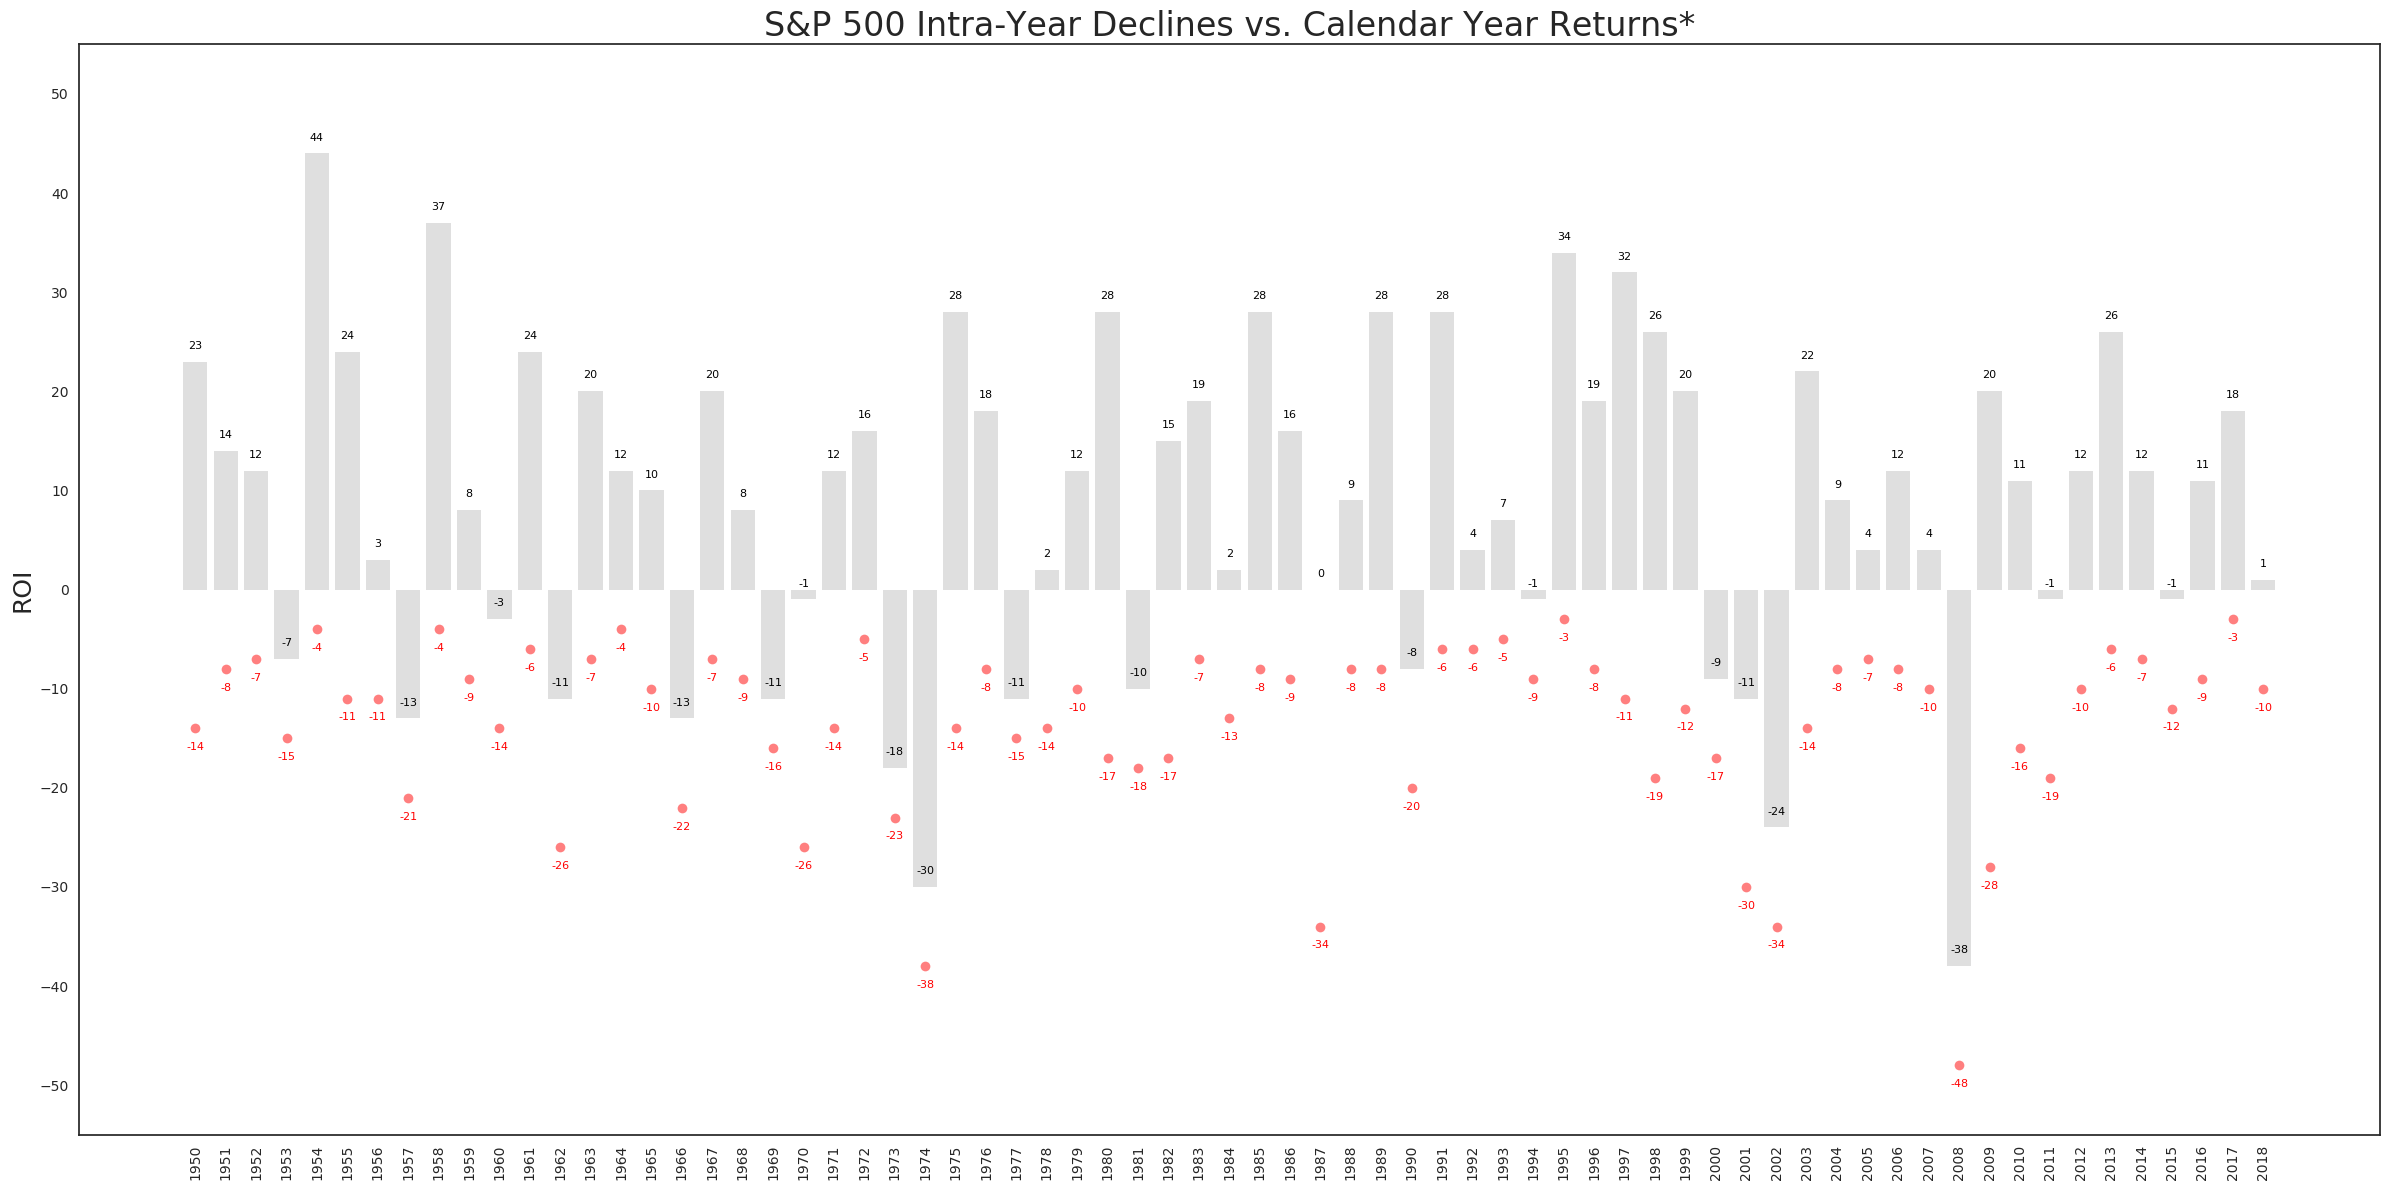

In [26]:
fig = plt.figure(figsize=(24,12), dpi=100, edgecolor='k')
ax = fig.add_subplot(111)

A = df_year_stats_3['year'].unique()
B = df_year_stats_3['intrayear_max_drop_roi'].map(lambda x: 100 * x).map(lambda x: round(x))
C = df_year_stats_3['percent change over year'].map(lambda x: 100 * x).map(lambda x: round(x))

ax.set_alpha(0.5)
ax.set_title("S&P 500 Intra-Year Declines vs. Calendar Year Returns*", fontsize=24)
ax.set_ylabel("ROI", fontsize=18)
ax.set_ylim(-55,55) #(-0.55,0.55)
ax.set_yticks(np.arange(-50,60,10)) #(-0.5,0.6,0.1)

plt.bar(A, C, color='grey', alpha=0.25)
plt.plot(A, B, 'ro', alpha=0.5)
plt.xticks(rotation='vertical')

for xy in zip(A, B):
    ax.annotate('%s' % xy[1], xy=xy, xycoords='data', \
                xytext=(0, -10), textcoords='offset points', \
                horizontalalignment='center', verticalalignment='top', \
                size=8, color='r')

for xy in zip(A, C):
    ax.annotate('%s' % xy[1], xy=xy, xycoords='data', \
                xytext=(0, 15), textcoords='offset points', \
                horizontalalignment='center', verticalalignment='top', \
                size=8, color='k')

plt.tight_layout()
plt.savefig('sp500_intra-year_declines_vs_calendar_year_returns.png', dpi=300, facecolor='w', edgecolor='w')
plt.show();

## S&P 500 Biggest Decline From Start vs. Calendar Year Returns*

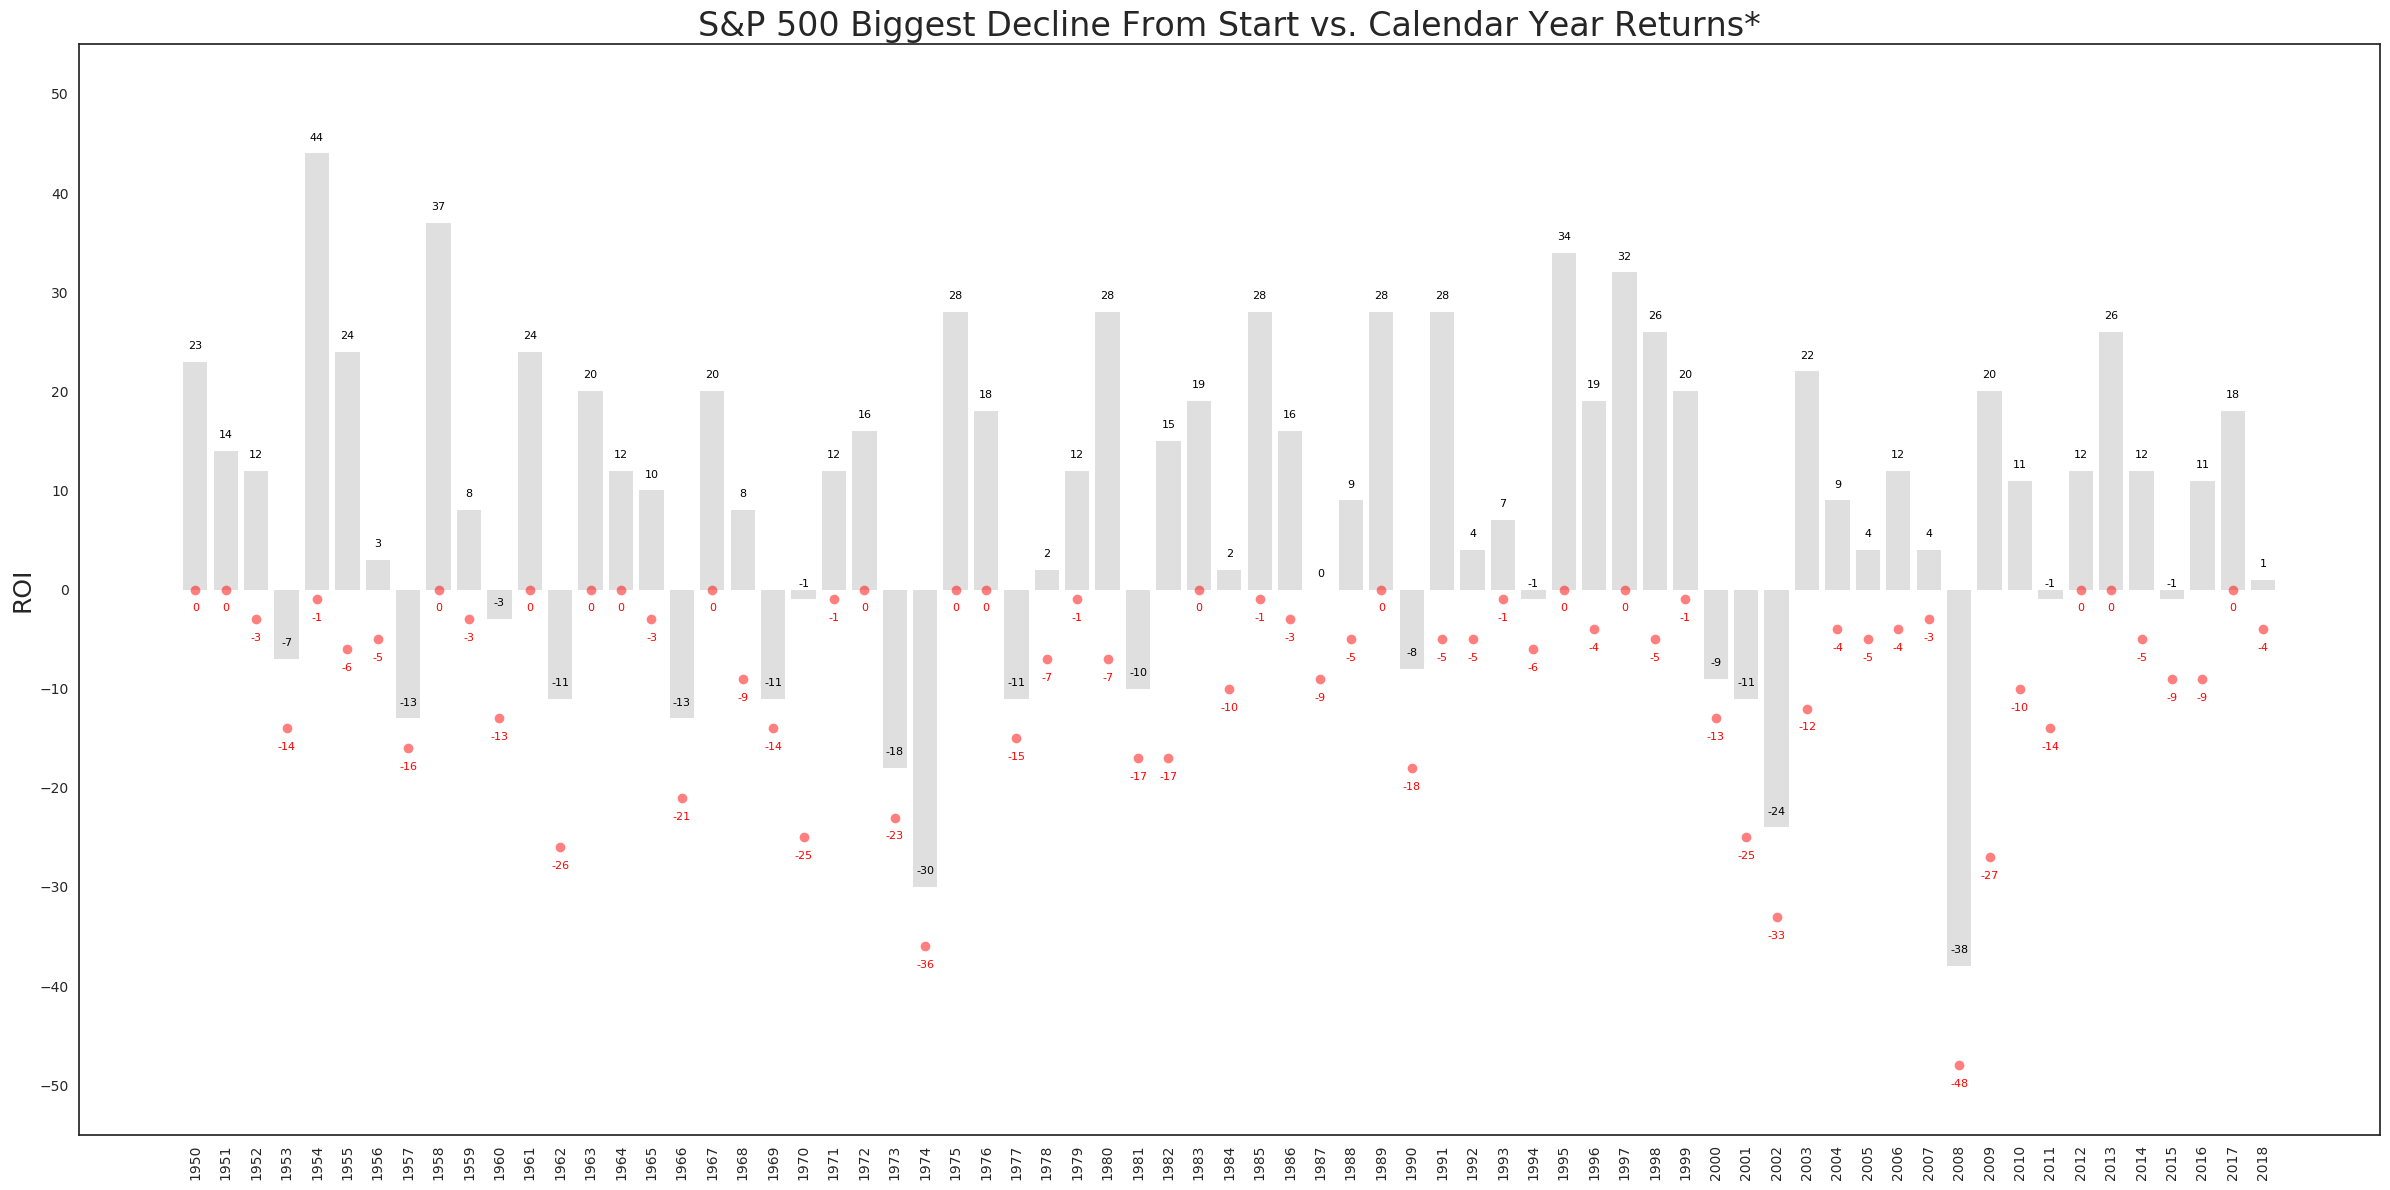

In [27]:
fig = plt.figure(figsize=(24,12), dpi=100, edgecolor='k')
ax = fig.add_subplot(111)

A = df_year_stats_3['year'].unique()
B = df_year_stats_3['percent biggest drop from start'].map(lambda x: 100 * x).map(lambda x: round(x))
C = df_year_stats_3['percent change over year'].map(lambda x: 100 * x).map(lambda x: round(x))

ax.set_alpha(0.5)
ax.set_title("S&P 500 Biggest Decline From Start vs. Calendar Year Returns*", fontsize=24)
ax.set_ylabel("ROI", fontsize=18)
ax.set_ylim(-55,55) #(-0.55,0.55)
ax.set_yticks(np.arange(-50,60,10)) #(-0.5,0.6,0.1)

plt.bar(A, C, color='grey', alpha=0.25)
plt.plot(A, B, 'ro', alpha=0.5)
plt.xticks(rotation='vertical')

for xy in zip(A, B):
    ax.annotate('%s' % xy[1], xy=xy, xycoords='data', \
                xytext=(0, -10), textcoords='offset points', \
                horizontalalignment='center', verticalalignment='top', \
                size=8, color='r')

for xy in zip(A, C):
    ax.annotate('%s' % xy[1], xy=xy, xycoords='data', \
                xytext=(0, 15), textcoords='offset points', \
                horizontalalignment='center', verticalalignment='top', \
                size=8, color='k')

plt.tight_layout()
plt.savefig('sp500_biggest_decline_from_start_vs_calendar_year_returns.png', dpi=300, facecolor='w', edgecolor='w')
plt.show();